**MSFT** - Microsoft Corporation \
**TSLA** - Tesla \
**COKE** - Coca-Cola Consolidated, Inc.  \
**INTC** - Intel Corporation  

In [12]:
# Import libraries
import os
import sys
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.dates import DateFormatter

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

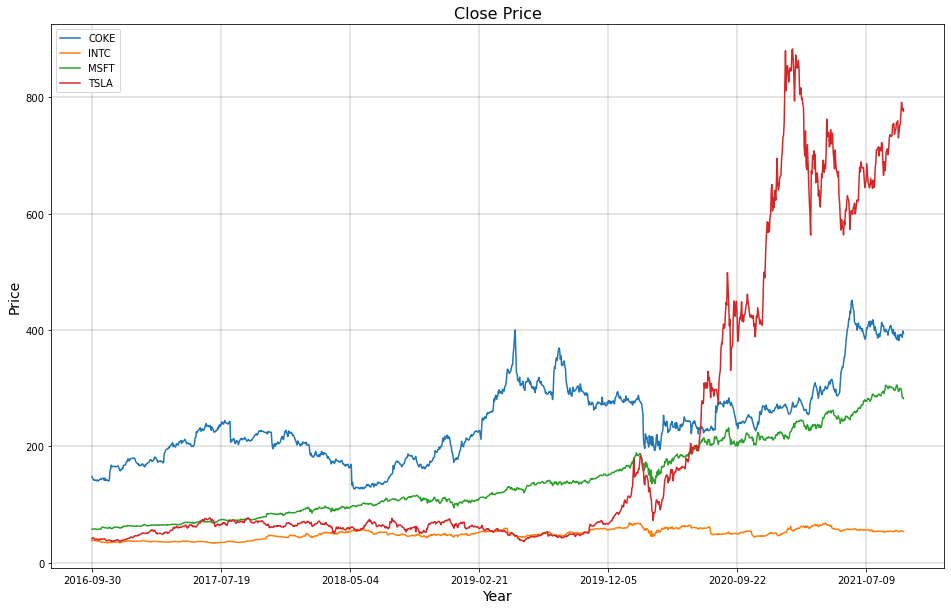

In [ ]:
# Create placeholder for data
data = pd.DataFrame(columns=stocks)

# Fetch the data
for stock in stocks:
    data[stock] = pd.read_csv(stock + '.csv')['Close']
    
# Plot all the close prices
price_data.groupby('Name')['Close'].plot(figsize=(16, 10))

# Show the legend
plt.legend(loc = 'upper left')

# Define the label for the title of the figure
plt.title("Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-', linewidth=0.2)

plt.show()

# Model

# COKE

In [4]:
price_data = pd.read_csv("COKE.csv")

In [5]:
price_data.shape

(1243, 25)

In [6]:
price_data.loc[price_data['Target'] == 0.0] = 1.0

In [8]:
# Grab X & Y Columns
X_Cols = price_data[['RSI','r_percent','ROC','MACD','k_percent']] 
Y_Cols = price_data['Target']

In [10]:
Y_Cols.value_counts()

Target
 1.0    647
-1.0    596
Name: count, dtype: int64

## Normalization

In [17]:
scaler = StandardScaler()
X_Cols_n = scaler.fit_transform(X_Cols)
X_Cols_n = pd.DataFrame(X_Cols_n, columns=X_Cols.columns)
X_Cols_n.describe()

,RSI,r_percent,ROC,MACD,k_percent
count,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03
mean,3.658466e-16,5.716353e-17,5.716353e-18,3.143994e-17,-2.286541e-16
std,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00,1.000402e+00
min,-2.738677e+00,-1.721526e+00,-3.706256e+00,-3.189264e+00,-1.715706e+00
25%,-6.600936e-01,-9.343979e-01,-4.643082e-01,-6.053478e-01,-9.304661e-01
50%,-2.643991e-02,5.601913e-02,-5.435440e-02,-7.674524e-02,5.433721e-02
75%,7.157085e-01,9.454353e-01,3.761143e-01,5.183936e-01,9.303083e-01
max,2.405609e+00,1.546588e+00,1.170863e+01,5.081254e+00,1.518893e+00


In [18]:
X_Cols = X_Cols_n

In [19]:
# Split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X_Cols, Y_Cols, train_size = 0.65, random_state=1)

In [20]:
# Create a Random Forest Classifier
rand_frst_clf = RandomForestClassifier()

# Fit the data to the model
rand_frst_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_frst_clf.predict(X_test)

In [21]:
# Print the Accuracy of our Model.
print('Correct Prediction (%): ', accuracy_score(y_test, y_pred, normalize = True) * 100.0)

Correct Prediction (%):  65.82568807339449


## SVM

In [22]:
from sklearn import svm

svm_clf = svm.SVC()

svm_clf.fit(X_train, y_train)

SVC()

In [23]:
y_pred = svm_clf.predict(X_test)

In [24]:
print('Correct Prediction (%): ', accuracy_score(y_test, y_pred, normalize = True) * 100.0)

Correct Prediction (%):  67.66055045871559


## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=50)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
print('Correct Prediction (%): ', accuracy_score(y_test, y_pred, normalize = True) * 100.0)

Correct Prediction (%):  69.4954128440367


# XGB

In [28]:
from xgboost import XGBClassifier

# fit model no training data
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# make predictions for test data
y_pred = model_xgb.predict(X_test)
print('Correct Prediction (%): ', accuracy_score(y_test, y_pred, normalize = True) * 100.0)

## StratifiedKFold

In [29]:
from sklearn.model_selection import StratifiedKFold, KFold

skf = StratifiedKFold(n_splits=5, shuffle = True) # shuffle default = False
knn = []
rfc = []
svm = []
xgb = []

for train_index, test_index in skf.split(X_Cols, Y_Cols):
   # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_Cols.iloc[train_index], X_Cols.iloc[test_index]
    y_train, y_test = Y_Cols.iloc[train_index], Y_Cols.iloc[test_index]
    # random forest
    rand_frst_clf.fit(X_train, y_train)
    rfc.append(rand_frst_clf.score(X_test, y_test))
    # svm
    svm_clf.fit(X_train, y_train)
    svm.append(svm_clf.score(X_test, y_test))
    # knn
    classifier.fit(X_train, y_train)
    knn.append(classifier.score(X_test, y_test))
    # xgb
    model_xgb.fit(X_train, y_train)
    xgb.append(model_xgb.score(X_test, y_test))

NameError: name 'model_xgb' is not defined

In [ ]:
print('\nRandom Forest:', rfc)
print('Maximum Accuracy That can be obtained from this model is:',
      max(rfc)*100, '%')
print('Minimum Accuracy:',
      min(rfc)*100, '%')
#
print('\nSVM:', svm)
print('Maximum Accuracy That can be obtained from this model is:',
      max(svm)*100, '%')
print('Minimum Accuracy:',
      min(svm)*100, '%')
#
print('\nKNN:', knn)
print('Maximum Accuracy That can be obtained from this model is:',
      max(knn)*100, '%')
print('Minimum Accuracy:',
      min(knn)*100, '%')
#
print('\nXGB:', xgb)
print('Maximum Accuracy That can be obtained from this model is:',
      max(xgb)*100, '%')
print('Minimum Accuracy:',
      min(xgb)*100, '%')

## Hyperparameter

## SVM

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from sklearn.svm import SVC
from tqdm import tqdm


C = (1e-3, 1e+3, 'log-uniform')

gamma = ['scale', 'auto']

kernel = ['rbf', 'sigmoid', 'poly']

paramsSVM = {'C': C,
             'gamma': gamma,
             'kernel': kernel}

# define evaluation
cv_svm = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
# define the search
for i in tqdm(paramsSVM):
    search_svm = BayesSearchCV(estimator=SVC(), search_spaces=paramsSVM, n_jobs=-1, cv=cv_svm, verbose = 2)
    # perform the search
    search_svm.fit(X_train, y_train)
    # report the best result
    print(search_svm.best_score_)
    print(search_svm.best_params_)

0.6948102139406487
OrderedDict([('C', 19.08419117499997), ('gamma', 'scale'), ('kernel', 'rbf')])
0.6941844950540603
OrderedDict([('C', 32.84863353053467), ('gamma', 'auto'), ('kernel', 'rbf')])
0.6938133578713288
OrderedDict([('C', 14.560735666583811), ('gamma', 'auto'), ('kernel', 'rbf')])

## Prediction SVM

In [ ]:
from sklearn import svm

# 1
svm_1 = svm.SVC(C = 19.08419117499997, gamma = 'scale', kernel = 'rbf')        
svm_1.fit(X_train, y_train)
y_1 =svm_1.predict(X_test)
print('1. Correct Prediction (%): ', accuracy_score(y_test, y_1, normalize = True) * 100.0)

# 2
svm_2 = svm.SVC(C = 32.84863353053467, gamma = 'auto', kernel = 'rbf')        
svm_2.fit(X_train, y_train)
y_2 =svm_2.predict(X_test)
print('2. Correct Prediction (%): ', accuracy_score(y_test, y_2, normalize = True) * 100.0)

# 3
svm_3 = svm.SVC(C = 14.560735666583811, gamma = 'auto', kernel = 'rbf')        
svm_3.fit(X_train, y_train)
y_3 =svm_3.predict(X_test)
print('3. Correct Prediction (%): ', accuracy_score(y_test, y_3, normalize = True) * 100.0)

## RFC

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from sklearn.svm import SVC
from tqdm import tqdm

# Random Forest
n_estimators = list(range(100, 1000, 50))

max_features = ['auto', 'sqrt', None, 'log2']

max_depth = list(range(10, 200, 10))
max_depth.append(None)

min_samples_split = [5, 10, 15, 20, 25, 30, 32]

min_samples_leaf = [2, 4, 5, 7, 12, 14, 16 ,20, 24, 28]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

for i in tqdm(random_grid):
    # define evaluation
    cv_rf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
    # define the search
    search_rf = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=random_grid, n_jobs=-1, cv=cv_rf, verbose = 100)
    # perform the search
    search_rf.fit(X_train, y_train)
    # report the best result
    print(search_rf.best_score_)
    print(search_rf.best_params_) # ZROBIC

0.7113756613756614
OrderedDict([('bootstrap', True), ('max_depth', 180), ('max_features', 'log2'), ('min_samples_leaf', 20), ('min_samples_split', 20), ('n_estimators', 900)])
0.7126209646499503
OrderedDict([('bootstrap', True), ('max_depth', 130), ('max_features', 'sqrt'), ('min_samples_leaf', 24), ('min_samples_split', 15), ('n_estimators', 350)])
0.7128479411088107
OrderedDict([('bootstrap', True), ('max_depth', 170), ('max_features', 'auto'), ('min_samples_leaf', 28), ('min_samples_split', 30), ('n_estimators', 900)])
0.7119829767655854
OrderedDict([('bootstrap', True), ('max_depth', 60), ('max_features', 'sqrt'), ('min_samples_leaf', 24), ('min_samples_split', 25), ('n_estimators', 250)])
0.7123610152595661
OrderedDict([('bootstrap', True), ('max_depth', 130), ('max_features', 'auto'), ('min_samples_leaf', 20), ('min_samples_split', 30), ('n_estimators', 100)])
0.7117513994325588
OrderedDict([('bootstrap', True), ('max_depth', 60), ('max_features', 'sqrt'), ('min_samples_leaf', 20), ('min_samples_split', 30), ('n_estimators', 200)])

## Prediction RF

In [ ]:
# 1
rf_1 = RandomForestClassifier(bootstrap = True, max_depth = 180, max_features = 'log2', min_samples_leaf = 20, min_samples_split = 20, n_estimators = 900)        
rf_1.fit(X_train, y_train)
y_1 =rf_1.predict(X_test)
print('1. Correct Prediction (%): ', accuracy_score(y_test, y_1, normalize = True) * 100.0)

# 2
rf_2 = RandomForestClassifier(bootstrap = True, max_depth = 130, max_features = 'sqrt', min_samples_leaf = 24, min_samples_split = 15, n_estimators = 350)   
rf_2.fit(X_train, y_train)
y_2 =rf_2.predict(X_test)
print('2. Correct Prediction (%): ', accuracy_score(y_test, y_2, normalize = True) * 100.0)

# 3
rf_3 = RandomForestClassifier(bootstrap = True, max_depth = 170, max_features = 'auto', min_samples_leaf = 28, min_samples_split = 30, n_estimators = 900)  
rf_3.fit(X_train, y_train)
y_3 =rf_3.predict(X_test)
print('3. Correct Prediction (%): ', accuracy_score(y_test, y_3, normalize = True) * 100.0)

# 4
rf_4 = RandomForestClassifier(bootstrap = True, max_depth = 60, max_features = 'sqrt', min_samples_leaf = 24, min_samples_split = 25, n_estimators = 250)  
rf_4.fit(X_train, y_train)
y_4 =rf_4.predict(X_test)
print('4. Correct Prediction (%): ', accuracy_score(y_test, y_4, normalize = True) * 100.0) 

# 5
rf_5 = RandomForestClassifier(bootstrap = True, max_depth = 130, max_features = 'auto', min_samples_leaf = 20, min_samples_split = 30, n_estimators = 100)  
rf_5.fit(X_train, y_train)
y_5 =rf_1.predict(X_test)
print('5. Correct Prediction (%): ', accuracy_score(y_test, y_5, normalize = True) * 100.0)

# 6
rf_6 = RandomForestClassifier(bootstrap = True, max_depth = 60, max_features = 'sqrt', min_samples_leaf = 20, min_samples_split = 30, n_estimators = 200)  
rf_6.fit(X_train, y_train)
y_6 =rf_6.predict(X_test)
print('6. Correct Prediction (%): ', accuracy_score(y_test, y_6, normalize = True) * 100.0)

# XGB

In [24]:
pip install scikit-optimize

     |████████████████████████████████| 100 kB 3.1 MB/s 


In [25]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from xgboost import XGBClassifier
from tqdm import tqdm

# XGBoost
booster = ['gbtree', 'dart', 'gblinear']

eta = [0.01, 0.03, 0.06, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4]

gamma = list(range(0, 15, 1))

max_depth = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

min_child_weight = list(range(0, 10, 1))

max_delta_step  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

subsample = [0.2, 0.5, 0.6, 0.7, 0.8, 1]

xgb = {'booster': booster,
               'eta': eta,
               'gamma': gamma,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'max_delta_step': max_delta_step,
               'subsample': subsample}

for i in tqdm(xgb):
    # define evaluation
    xboost = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
    # define the search
    search_xt = BayesSearchCV(estimator=XGBClassifier(), search_spaces=xgb, n_jobs=-1, cv=xboost, verbose = 100)
    # perform the search
    search_xt.fit(X_train, y_train)
    # report the best result
    print(search_xt.best_score_)
    print(search_xt.best_params_)

  0%|          | 0/7 [00:00<?, ?it/s]

Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for eac

 14%|█▍        | 1/7 [03:13<19:20, 193.44s/it]

0.712145728643216
OrderedDict([('booster', 'dart'), ('eta', 0.06), ('gamma', 6), ('max_delta_step', 7), ('max_depth', 4), ('min_child_weight', 9), ('subsample', 0.6)])
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidat

 29%|██▊       | 2/7 [06:19<15:44, 188.88s/it]

0.7098492462311558
OrderedDict([('booster', 'dart'), ('eta', 0.01), ('gamma', 7), ('max_delta_step', 2), ('max_depth', 3), ('min_child_weight', 2), ('subsample', 0.2)])
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candida

 43%|████▎     | 3/7 [09:12<12:06, 181.63s/it]

0.718862646566164
OrderedDict([('booster', 'dart'), ('eta', 0.15), ('gamma', 10), ('max_delta_step', 3), ('max_depth', 9), ('min_child_weight', 3), ('subsample', 0.7)])
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candida

 57%|█████▋    | 4/7 [12:20<09:12, 184.12s/it]

0.7134941373534338
OrderedDict([('booster', 'dart'), ('eta', 0.06), ('gamma', 9), ('max_delta_step', 7), ('max_depth', 9), ('min_child_weight', 4), ('subsample', 0.6)])
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candida

 71%|███████▏  | 5/7 [15:17<06:03, 181.62s/it]

0.7108425460636515
OrderedDict([('booster', 'dart'), ('eta', 0.25), ('gamma', 7), ('max_delta_step', 1), ('max_depth', 4), ('min_child_weight', 4), ('subsample', 0.2)])
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candida

 86%|████████▌ | 6/7 [18:25<03:03, 183.88s/it]

0.7111658291457287
OrderedDict([('booster', 'dart'), ('eta', 0.3), ('gamma', 12), ('max_delta_step', 5), ('max_depth', 3), ('min_child_weight', 1), ('subsample', 0.7)])
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candida

100%|██████████| 7/7 [21:28<00:00, 184.10s/it]

0.7115443886097153
OrderedDict([('booster', 'gbtree'), ('eta', 0.2), ('gamma', 8), ('max_delta_step', 3), ('max_depth', 10), ('min_child_weight', 9), ('subsample', 0.7)])


## ++++++++++++++++

In [ ]:
y_pred = rf_random.predict(X_test)
# ACCURACY

# Once the predictions have been made, then grab the accuracy score.
print('Correct Prediction (%): ', accuracy_score(y_test, rf_random.predict(X_test), normalize = True) * 100.0)

# CLASSIFICATION REPORT

# Traget names
target_names = ['Down Day', 'Up Day']

# Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

# Add it to a dataframe, transpose it for readability
report_df = pd.DataFrame(report).transpose()
display(report_df)
print('\n')

# FEATURE IMPORTANCE

feature_imp = pd.Series(rand_frst_clf.feature_importances_, index=X_Cols.columns).sort_values(ascending=False)
display(feature_imp)

Correct Prediction (%):  68.57798165137615


,precision,recall,f1-score,support
Down Day,0.665049,0.668293,0.666667,205.00000
Up Day,0.704348,0.701299,0.702820,231.00000
accuracy,0.685780,0.685780,0.685780,0.68578
macro avg,0.684698,0.684796,0.684743,436.00000
weighted avg,0.685870,0.685780,0.685821,436.00000


NameError: name 'rand_frst_clf' is not defined

## Inne

In [ ]:
# Define the traget names
target_names = ['Up', 'Down']

# Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred,target_names = target_names, output_dict = True)

# Add it to a data frame, transpose it for readability.
report_df = pd.DataFrame(report).transpose()
report_df

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Create confusion matrix
rf_matrix = confusion_matrix(y_test, y_pred)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

# Calculate the same metrics up above
accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))

# Create graph to plot confusion matrix (%)
disp = plot_confusion_matrix(rand_frst_clf, X_test, y_test, display_labels = ['Down Day', 'Up Day'], normalize = 'true', cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()

In [ ]:
feature_imp = pd.Series(rand_frst_clf.feature_importances_, index=X_Cols.columns).sort_values(ascending = False)
feature_imp

In [ ]:
# Create an ROC Curve plot
rfc_disp = plot_roc_curve(rand_frst_clf, X_test, y_test, alpha = 0.9)
plt.show()

In [ ]:
# Print out-of-bag error score
print('Random Forest Out-Of-Bag Error Score: {}'.format(rand_frst_clf.oob_score_))

In [ ]:
# ROC CURVE

fig, ax = plt.subplots()

# Create an ROC Curve plot
rfc_disp = plot_roc_curve(rand_frst_clf, X_test, y_test, alpha = 0.8, name='ROC Curve', lw=1, ax=ax)

# Add our Chance Line
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="ROC Curve Random Forest")

# Add the legend to the plot
ax.legend(loc="lower right")

plt.show()